<font size = 6><i>Description et visualisation des données</i></font>



--

Ce notebook utilise les librairies numpy et pandas. Si vous ne connaissez pas ces librairies, vous pouvez consulter les scripts correpondants de ce dossier, numpy et pandas.

Cette partie présente quelques outils pour la visualisation et la description des données. À la fin, le but est de pouvoir visualiser un jeu de données à l'aide de graphiques, ou de statistiques simples.

Pour approfondir:
- La partie stat: http://wikistat.fr/
- La partie graphique: https://python-graph-gallery.com/

Les balises <font color="red"> Maths </font> ne sont pas obligatoires à lire, et clairement pas à apprendre. Elles sont là car parfois, connaitre les formules qui ont servi à construire les modèles permettent de mieux interpréter les résultats.

<font size= 5><b>I- Imports</b></font>

<font size= 4>I-1 Librairies</font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# matplotlib.pyplot gère la partie visualisation graphique
import seaborn as sns
# Pour aller plus loin dans la partie visualisation, multi-plot et heatmap

<font size= 4>I-2 Données</font>

On travaille sur un jeu de données caractérisant n = 100 personnes.

http://www.info.univ-angers.fr/~gh/Datasets/ronfle.htm

Pour chaque individu, on dispose des variables suivantes:


- <b>IDEN</b>  :  Numéro de l'individu

- <b>SEXE</b>  :  Sexe de la personne (0=homme, 1=femme)

- <b>AGE</b>    :    En années

- <b>TAILLE</b> :    En cm

- <b>POIDS</b>  :    En kg

- <b>TABA</b>   :    Comportement au niveau du tabac (1=fumeur,0=non-fumeur)

- <b>ALCOOL</b>  :   Nombre de verres bus par jour (en équivalent verre de vin rouge)

- <b>RONFLE</b>  :   Diagnostic de ronflement (1=ronfle,0=ne ronfle pas)

La variable d'intérêt est <b>RONFLE</b>, on s'intéresse aux ronflements des individus, en fonction de leurs caractéristiques personelles.




In [2]:
data = pd.read_table(filepath_or_buffer = "https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/ronfle.csv", # l'adresse du fichier
              header = 0, # noms de variables en ligne 1
              delimiter =',', # délimiteur, ici la virgule pour un csv
              index_col=0) # l'index de la colonne du nom des individus

# Par souci de lisibilité, j'ai changé les 0 et 1 en labels plus explicites
tabac = [(1-tab)* "Non-"+"Fumeur" for tab in data['TABA']]
sexe = [tab*"Femme"+(1-tab)*"Homme" for tab in data['SEXE']]
ronflement = [(1-tab)* "Non-"+"Ronfleur" for tab in data['RONFLE']]


# On ajoute les variables modifiées dans un nouveau dataset
ronfle = pd.DataFrame({'Age': data['AGE'],
                       'Poids': data['POIDS'],
                       'Taille': data['TAILLE'],
                       'Alcool': data['ALCOOL'],
                       'Sexe': sexe, 
                       'Ronflement' : ronflement,
                       'Tabac': tabac})


ronfle.head() # on affiche les cinq premières lignes, c'est équivalent à ronfle[0:5]

,Age,Poids,Taille,Alcool,Sexe,Ronflement,Tabac
P0001,47,71,158,0,Homme,Non-Ronfleur,Fumeur
P0002,56,58,164,7,Homme,Ronfleur,Non-Fumeur
P0003,46,116,208,3,Homme,Non-Ronfleur,Fumeur
P0005,70,96,186,3,Homme,Non-Ronfleur,Fumeur
P0006,51,91,195,2,Homme,Ronfleur,Fumeur


Le troisième individu (P0003) est un homme de 46 ans, qui pèse 116 kilos et mesure 2.08 mètres. Il boit trois verres d'alcool par jour, est fumeur et ne ronfle pas.

Sur ce jeu de données, l'age, le poids, la taille et l'alcool sont des <b>variables quantitatives</b>, on peut leur donner une mesure numérique. 

Le sexe, ronfle, et tabac sont des <b>variables qualitatives</b>, on peut les catégoriser.

<font size= 5><b>II- Description univariée</b></font>

<font size= 4>II- 1 Variable quantitative</font>

On prend l'exemple de la taille

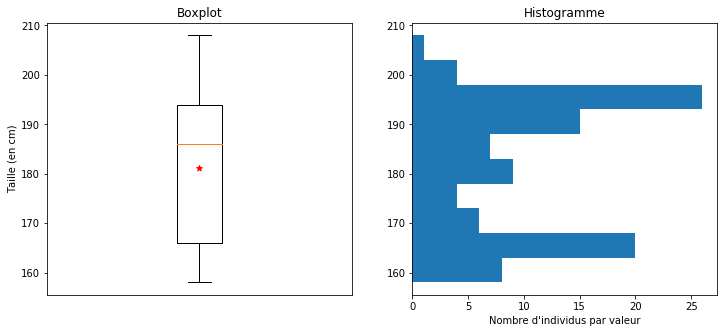

In [3]:
taille = ronfle['Taille'] # accès à la variable taille du datasets ronfle


plt.subplots(1, 2, figsize=(12,5))
# on divise la plage des affichages graphiques, qui fait 12cm de long et 5 de  haut, en deux parties

# Le premier plot
plt.subplot(1, 2, 1)
plt.boxplot(taille)
plt.scatter(1,np.mean(taille), marker ="*", color="red") # Ajout de la moyenne (l'étoile)
plt.title("Boxplot")
plt.xticks([]) # Pas de graduation des valeurs pour l'axe des abcisses
plt.ylabel("Taille (en cm)")

# Le second

plt.subplot(1, 2, 2)
plt.hist(taille, orientation = 'horizontal')
plt.xlabel("Nombre d'individus par valeur")
plt.title("Histogramme")

# Et on affiche le tout
plt.show()

Le boxplot se base sur trois valeurs: le premier quartile (la barre inférieure du rectangle), la  médiane (barre rouge), et le troisième quartile (la barre supérieure du rectangle). 

Le premier quartile Q1 est la valeur minimale pour laquelle au moins 25% des données sont inférieures ou égales à cette valeur.
La médiane Q2 est la valeur minimale pour laquelle au moins la moitié des données sont inférieures ou égales à cette valeur.
Le troisième quartile Q3 est la valeur minimale pour laquelle au moins 75% des données sont inférieures ou égales à cette valeur.

On ajoute parfois la moyenne (représentée par une étoile rouge sur le graphique).

Le boxplot traduit sous une forme condensée les informations de l'histogramme de droite.

<font color="red"> Maths</font> Les bornes hautes et basses sont calculées grâce à l'écart interquartile, de la manière suivante : $$ Q2 \pm 1.57 * \frac{Q3-Q1}{\sqrt{n}}$$



Petite parenthèse concernant matplotlib : la commande '%matplotlib inline' permet d'éviter de recopier plt.show() pour afficher sa figure. Libre à vous de l'utiliser, ou non!

On décrit en général totalement une variable quantitative à l'aide des informations suivantes :

In [4]:
def univarie(tab):
    # renvoie la liste des informations essentielles pour la description d'une variable quantitative
    return(pd.DataFrame({
    'Statistique': ["Nombre d'individus n",'Moyenne', 
                    'Variance','Écart-type', 'Minimum', 
                     'Percentile 5%', 'Q1', 'Médiane', 
                     'Q3', 'Percentile 95%','Maximum'],
    'Valeur': [len(tab), np.mean(tab), 
               np.var(tab), np.std(tab), np.min(tab), 
               np.percentile(tab,5), np.percentile(tab, 25), np.percentile(tab, 50),
               np.percentile(tab, 75), np.percentile(tab,95), np.max(tab)]}
    ).set_index('Statistique'))

univarie(ronfle['Alcool'])

,Valeur
Statistique,
Nombre d'individus n,100.00000
Moyenne,2.95000
Variance,11.20750
Écart-type,3.34776
Minimum,0.00000
Percentile 5%,0.00000
Q1,0.00000
Médiane,2.00000
Q3,4.25000


La moyenne de la taille d'une population est la taille la plus représentative de la population.

<font color="red"> Maths</font> La moyenne d'une variable $X= (x_{1}, ... , x_{n})$ vaut $\bar{x} = \frac{\sum_{i=1}^{n}x_{i}}{n}$

La variance de la taille d'une population correspond à la dispersion des tailles au sein de la population. Une variance forte pour une population donnée implique qu'au sein de cette population, il y aura des personnes de grande taille et des personnes de petite taille.

<font color="red"> Maths</font> La variance d'une variable est la somme des écarts à la moyenne au carré, soit $Var(X) = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}{n}$

Tout comme la variance, l'écart-type est une mesure de dispersion des tailles dans la population.

<font color="red"> Maths</font> L'écart-type d'une variable est la racine carrée de la variance, soit $\sigma_{X}= \sqrt{Var(X)}=\sqrt{\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}{n}}$


Le percentile d'ordre $\alpha$ d'une variable correspond à la valeur minimale pour laquelle au moins $\alpha$% des données sont supérieures ou égales à cette valeur. Par exemple, la médiane Q2 correspond au percentile d'ordre 50%.

La fonction describe de pandas donne toutes les infos concernant les variables quantitatives des dataframes.

<font size= 4>II- 2 Variables qualitatives</font>

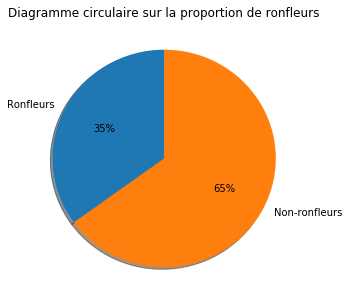

In [5]:
ronflement = ronfle['Ronflement']

nbNonRonfleur = len(ronflement[ronflement == "Non-Ronfleur"])
nbRonfleur = len(ronflement[ronflement == "Ronfleur"])

compteRonfleurs = np.array((nbRonfleur, nbNonRonfleur), np.int64)

#On crée un tableau comptant le nombre d'occurences de chaque modalité

plt.figure(figsize=(5,5))
plt.pie(compteRonfleurs,
        startangle = 90,
        # Par convention, on commence par la proportion la plus importante à un angle de 90°
        # Puis on classe les différentes proportions par ordre décroissant
        labels = list(("Ronfleurs", "Non-ronfleurs")),
        autopct='%1.f%%', # Arrondi du pourcentage à l'entier
        shadow = True)
plt.title("Diagramme circulaire sur la proportion de ronfleurs")
plt.show()

<font size= 5><b>III- Description bivariée</b></font>

<font size= 4> III- 1 Bivarié, quanti * quanti</font>

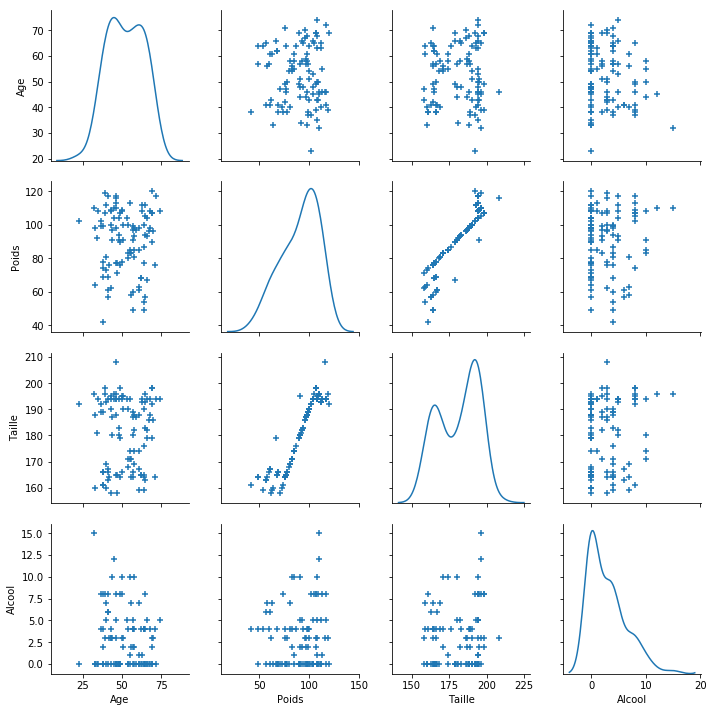

In [6]:
sns.pairplot(ronfle,
             vars = ['Age','Poids','Taille','Alcool'], 
             # On ne sélectionne que les variables quantitatives
            diag_kind = 'kde', 
             # pour l'univarié sur la diagonale, on choisit une estimation de la densité
             # tester 'hist' pour l'histogramme 
            kind = 'scatter', 
             # nuage de points
            markers = "+")
            # forme des points
plt.show()

Représenter les nuages de points graphiquement permet des fois de directement voir le lien existant entre deux variables. Par exemple, la taille est liée au poids.

La corrélation de deux variables est la mesure de l'intensité de la liaison de ces variables. Autrement dit, si l'une de ces variables varie, et que l'on connait la corrélation des deux variables, on peut prévoir comment évoluera la seconde.


<font color="red">Maths</font>
Par exemple, le coefficient de corrélation linéaire de Pearson vaut $$\hat{\sigma}_{XY} =\frac{1}{n}\frac{{\sum_{i=1}^n (x_i - \bar x)\cdot(y_i - \bar y)}}{\sigma_{x}\sigma_{y}}$$ où $\sigma_{x}$ et $\sigma_{y}$ sont respectivement les écart-types des variables X et Y

Ce coefficient en compris entre -1 et 1:
- S'il est inférieur à 0, la corrélation entre les deux variables est négative. L'augmentation d'une variable entrainera la diminution de l'autre.
- S'il est supérieur à 0, la corrélation entre les deux variables est positive. L'augmentation d'une variable entrainera l'augmentation de l'autre.

- Si sa valeur absolue est inférieure à 0.5, en général, on considère que la relation entre les deux variables est faible.

- Si sa valeur absolue est supérieure à 0.5, en général, on considère que la relation entre les deux variables est forte.

On appelle matrice des corrélations la matrice A pour lequel le coefficient A[i,j] est le coefficient de corrélation entre la variable i et la variable j. Elle et symétrique.

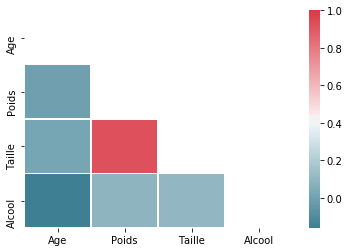

          0         1         2         3
0  1.000000 -0.003977  0.019381 -0.158743
1 -0.003977  1.000000  0.926974  0.091502
2  0.019381  0.926974  1.000000  0.106350
3 -0.158743  0.091502  0.106350  1.000000


In [7]:
quanti = ronfle[['Age','Poids','Taille','Alcool']]

corr = [[0 for x in range(4)] for y in range(4)]

# pour chaque vidéo, on calcule sa corrélation (Pearson) avec toutes les autres

for i in range(4):
    for j in range(4):
        corr[i][j] = np.corrcoef(quanti[quanti.columns[i]],quanti[quanti.columns[j]])[0,1]

corr = pd.DataFrame(data=corr)

# Masque pour enlever les valeurs inutiles
masque = np.zeros_like(corr, dtype=np.bool)
masque[np.triu_indices_from(masque)] = True

# Palette de couleurs
cmap = sns.diverging_palette(220, 10,
                             #étendue des couleurs
                             as_cmap=True)
                             # gradient de couleu, et pas de catégorie

# On représente la matrice des corrélations
sns.heatmap(corr, mask=masque, cmap=cmap, linewidths=.5,
            xticklabels = ('Age','Poids','Taille','Alcool'),
            yticklabels = ('Age','Poids','Taille','Alcool'))
plt.show()

# La matrice brute
print(corr)

L'intérêt de la heatmap est d'éviter de devoir analyser la matrice du dessous, qui contient pourtant la même quantité d'informationns.

<font size= 4> III- 2 Bivarié, quali * quali</font>

In [8]:
pd.crosstab(ronfle["Tabac"], ronfle["Sexe"])

Sexe,Femme,Homme
Tabac,,
Fumeur,10,54
Non-Fumeur,15,21


Pour représenter conjointement les répartitions des individus suivant les deux variables qualitatives, on utilise un <b>tableau de contingence</b>. Un exemple d'utilisation:  dans notre population, 15 femmes ne fument pas et 54 hommes fument.

Si on additionne les effectifs colonne à colonne, on retrouve la description univariée de la variable tabac vue en II-2, à savoir 65 fumeurs et 35 non-fumeurs.

<font size= 4> III- 3 Bivarié, quali * quanti</font>

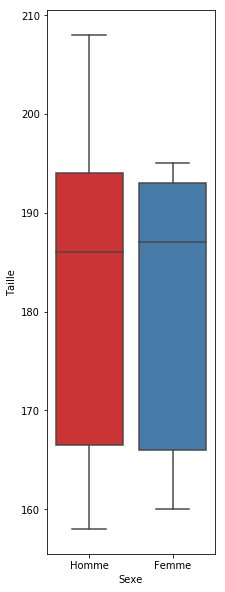

In [9]:
plt.figure(figsize=(3,10))
sns.boxplot(x = "Sexe", y = "Taille", data = ronfle, palette= "Set1")
plt.show()

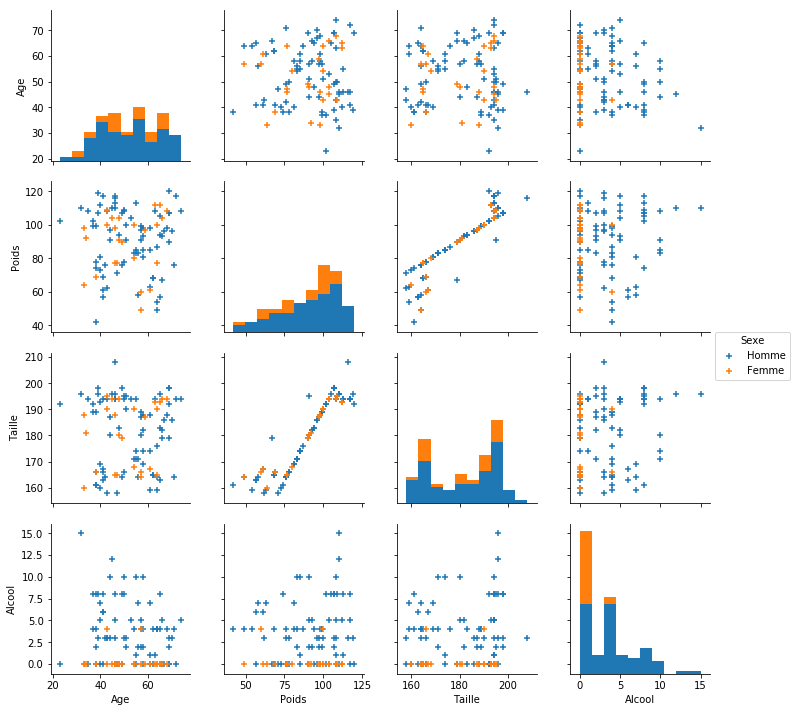

In [10]:
sns.pairplot(ronfle,
             vars = ['Age','Poids','Taille','Alcool'],
             hue = "Sexe", # différents groupes de couleurs en fonction d'une variable qualitative
             diag_kind = 'hist', 
             kind = 'scatter',
             markers = "+")
plt.show()

Colorer les groupes met parfois en avant le comportement spécifique d'une part de la population; ici, les femmes consomment moins d'alcool que les hommes.

<font size= 5><b>IV- D'autres formats de données</b></font>

--

<font size= 4>Seulement si vous avez du temps en plus...</font>

Pour cette partie, nous avons besoin d'un autre jeu de données:

- Allez sur le site https://trends.google.fr/trends/
- Tapez un mot de recherche qui vous intéresse
- Appuyez sur entrée pour afficher la page des résultats

Dans cette partie, on va essayer de <b>reproduire les graphiques de la page précédente</b> à l'aide de python.

La première partie va imiter la série temporelle, la deuxième va cartographier les recherches, et la troisième va créer un graphe à base des termes associés à la recherche.

<font size= 4> IV- 1 Les données temporelles</font>

On s'intéresse à la série temporelle, commencez par télécharger le csv sur votre ordinateur.

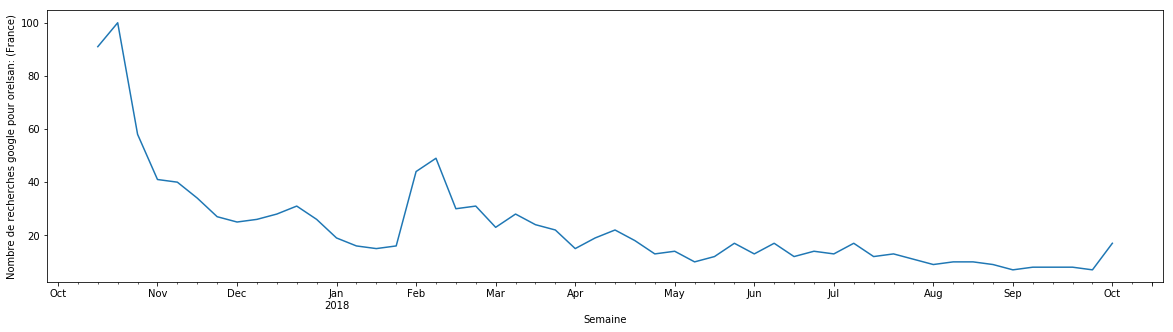

In [11]:
# À remplacer par l'adresse du dossier de votre ordinateur dans lequel le fichier est stocké (téléchargements)
adresse = "C:\\Users\\llesoil\\Downloads\\"

# À remplacer par le nom du csv s'il est différent chez vous
nomCsv = "multiTimeline.csv"

gttime = pd.read_table(open(adresse+nomCsv,"r"), delimiter = ',', 
              skiprows=2) # enlève la partie en-tête du csv, rajoutée par le site google trends

nomRecherche = gttime.columns.values[1] 
# Normalement, c'est le nom de votre recherche

plt.figure(figsize=(20,5))
serie = pd.Series(data = np.array(gttime[nomRecherche]), 
                  index= pd.to_datetime(gttime[gttime.columns.values[0]]))
plt.xlabel("Date")
plt.ylabel("Nombre de recherches google pour "+nomRecherche)
serie.plot()
plt.show()

<font size= 4> IV- 2 Les données géographiques</font>

On s'intéresse aux données départementales, commencez par rechercher par département (et pas par région).
Puis téléchargez le csv sur votre ordinateur.

In [12]:
# À remplacer par le nom du csv s'il est différent chez vous
nomCsv = "geoMap(1).csv"

# Toujours à l'aide de pandas, on importe les données
gtgeo = pd.read_table(open(adresse+nomCsv,"r"), delimiter = ',', skiprows=2)

nomRecherche = gtgeo.columns.values[1] 


# Comme google trends ne référence pas les numéros de département (par exemple 35 pour l'Ille-et-Vilaine), 
# j'ai créé une table de transition avec les libellés de google trends et les numéros
transition = pd.read_table("https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/transition.csv",
                           delimiter = ',')

# On fait la jointure de la table initiale avec la table de transition précédente
# La table finale reprend les infos de google trends, avec les numéros. 
geoFinal = gtgeo.set_index(gtgeo.columns.values[0]).join(transition.set_index('zone'))

geoFinal.head()

,indochine: (12/10/2017 â€“ 12/10/2018),dep
Zone de diffusion,,
Vosges,100,88
Meuse,95,55
Haute-Marne,85,52
Meurthe-et-Moselle,75,54
Orne,73,61


En témoignent la longueur et la complexité du code suivant, coder des cartes sous python n'est pas forcément la méthode la plus simple.
Si vous voulez être efficaces en vous impliquant peu, mieux vaut utiliser des logiciels de cartographie tout faits (comme QGIS par exemple, qui est codé en python).

C:\Users\llesoil\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


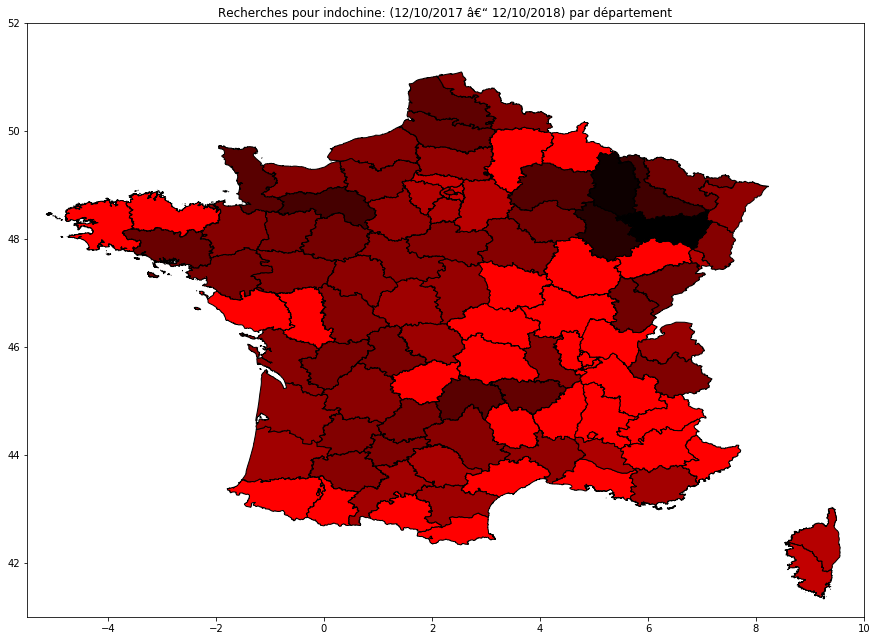

In [13]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

# Import du fichier shapefile
# à récupérer depuis /modelisation_des_problemes_scientifiques-/ressources/departements-20160218.shp.7z
# dézipper, puis changer l'adresse du dessous
shp = shapefile.Reader('C:\\Users\\llesoil\\Downloads\\departements-20160218-shp\\departements-20160218.shp')

plt.figure(figsize=(15,15))
plt.title('Recherches pour '+nomRecherche+' par département')

ax = plt.axes() # add the axes
ax.set_aspect('equal')

formes = shp.shapes()
donnees  = shp.shapeRecords()

icolor = 1

for indiceForme in range(len(formes)):
    
    shape = formes[indiceForme]
    
    indiceDep = donnees[indiceForme].record[0]
    
    valeurRecherche = geoFinal[geoFinal.columns[0]][np.where(geoFinal['dep']==str(indiceDep))[0]]
    
    if valeurRecherche.empty:
        rech = 0
    else:
        rech = valeurRecherche[0]
    
    # Les valeurs de couleur en rouge/vert/bleu
    R = (100-rech)/100
    G = 0
    B = 0

############################## Internet #####################################

    # check number of parts (could use MultiPolygon class of shapely?)
    nparts = len(shape.parts) # total parts
    if nparts == 1:
        polygon = Polygon(shape.points)
        patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
        ax.add_patch(patch)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = len(shape.points)

            polygon = Polygon(shape.points[i0:i1+1])
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)

    icolor = icolor + 1

############################## Fin Internet #####################################

plt.xlim(-5.5, 10)
plt.ylim(41, 52)
plt.show()

Les zones sombres sont les zones où le terme est beaucoup recherché, les zones claires là où il est peu recherché.

<font size= 4> IV- 3 Toujours plus de représentations graphiques</font>

Représentation d'une base graphe

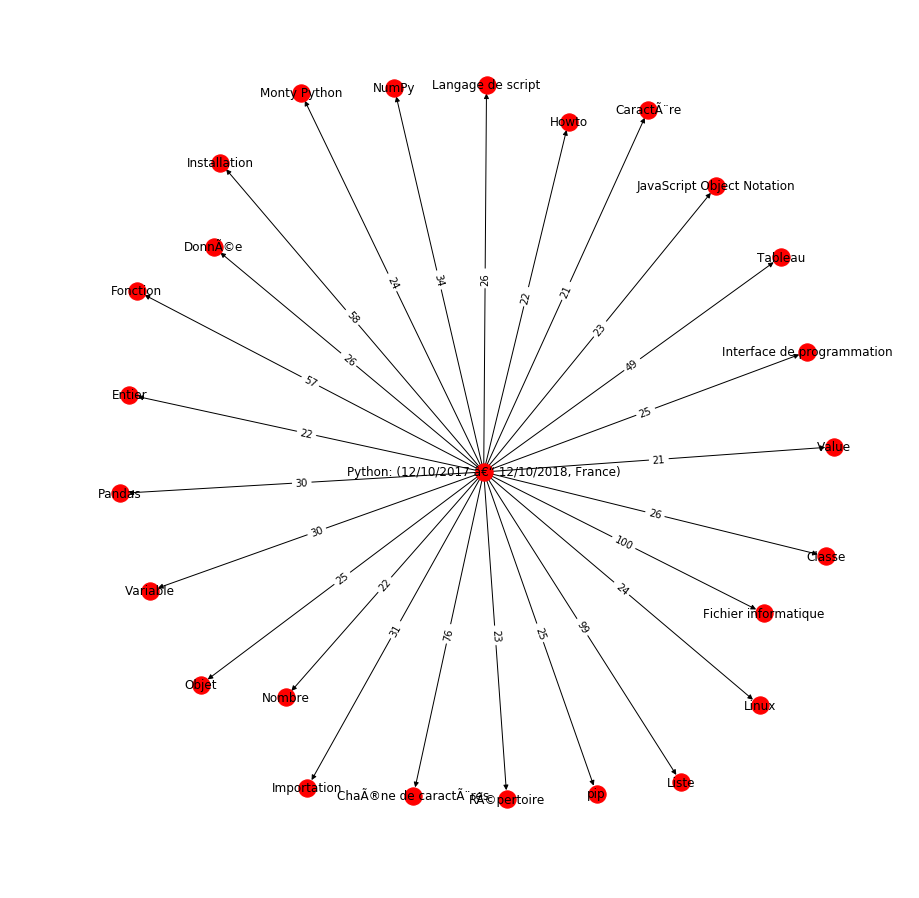

In [14]:
import random
import networkx as nx

# À remplacer par le nom du csv s'il est différent chez vous
nomCsv = "relatedEntities.csv"


nomRecherche = pd.read_table(open(adresse+nomCsv,"r"), delimiter = ',', header = 1).columns[0]

# Avant l'import, enlever la partie rising du csv
gtgraph = pd.read_table(open(adresse+nomCsv,"r"), delimiter = ',', skiprows = 3)

gtgraph.columns  = (nomRecherche, "Indicateur Recherche")

# on initialise le graphe orienté
G = nx.DiGraph()

#On ajoute le premier noeud correspondant à la recherche 'Python'
G.add_node(gtgraph.columns[0], key=(0,0))

for i in range(len(gtgraph)):
    # On ajoute chaque noeud correspondant à une recherche associée
    G.add_node(gtgraph[gtgraph.columns[0]][i],key=(i,i))
    # On les relie à 'Python'
    G.add_edge(gtgraph.columns[0], gtgraph[gtgraph.columns[0]][i],
               #en incluant l'indicateur de recherche
               weight= gtgraph[gtgraph.columns[1]][i])

plt.figure(figsize=(12,12)) 
#Positions en cercle
pos=nx.spring_layout(G)
#On dessine le graphe, avec les labels
nx.draw(G, pos, with_labels=True)
#On met les poids en label
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#Avant d'afficher
plt.show()

Plus le nombre d'une recherche associée est fort, plus la recherche est liée au sujet initial. Comme pour la partie d'avant, certains logiciels seront plus adaptés à la visualisation de bases graphes (notamment neo4j).

<font size= 5><b>V- Pour les fans de 3D</b></font>

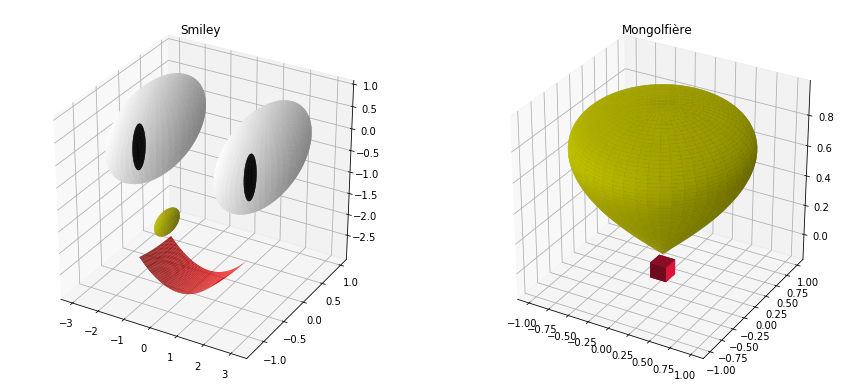

In [15]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(15,15))


############### Figure de gauche ########################

ax = fig.add_subplot(221, projection='3d', title = "Smiley")

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Oeil gauche, partie blanche
x = np.outer(np.cos(u), np.sin(v))-2
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='w')

# Oeil gauche, partie noire
x = np.outer(np.cos(u), np.sin(v))/8+1-2
y = np.outer(np.sin(u), np.sin(v))/8-1
z = np.outer(np.ones(np.size(u)), np.cos(v))/2+1/2
ax.plot_surface(x, y, z, color='black')

# Oeil droit, partie blanche
x = np.outer(np.cos(u), np.sin(v))+2
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='w')

# Oeil droit, partie noire
x = np.outer(np.cos(u), np.sin(v))/8+1+2
y = np.outer(np.sin(u), np.sin(v))/8-1
z = np.outer(np.ones(np.size(u)), np.cos(v))/2+1/2
ax.plot_surface(x, y, z, color='black')

# Nez jaune
x = np.outer(np.cos(u), np.sin(v))/4
y = (np.outer(np.sin(u), np.sin(v)))/4 -1
z = (np.outer(np.ones(np.size(u)), np.cos(v)))/4 -1
ax.plot_surface(x, y, z, color='y')


# Bouche
x = np.linspace(-1.5, 1.5, 50)
y = np.linspace(-1/2-1/4, 0, 50)
X, Y = np.meshgrid(x,y)
Z = (Y/2)**2 + (X/2)**2-3
ax.plot_surface(X, Y, Z, color='r')


############### Figure de droite ########################

ax = fig.add_subplot(222, projection='3d', title = "Mongolfière")

# Ballon
x = np.outer(np.cos(u), np.sin(v))
y = (np.outer(np.sin(u), np.sin(v)))
z = (np.outer(np.ones(np.size(u)), np.cos(v/2)))
ax.plot_surface(x, y, z, color='y')


########### Internet pour le cube ###############

def cuboid_data(o, size=(1,1,1)):
    # code taken from
    # https://stackoverflow.com/a/35978146/4124317
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

def plotCubeAt(pos=(0,0,0), size=(1,1,1), ax=None,**kwargs):
    # Plotting a cube element at position pos
    if ax !=None:
        X, Y, Z = cuboid_data( pos, size )
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, **kwargs)

########### Internet ###############
        
plotCubeAt(pos=(-0.1,-0.1,-0.15), size=(0.2,0.2,0.1), ax=ax, color="crimson")

plt.show()

Blender, un logiciel 3d libre d'utilisation, est codé en python. https://www.blender.org/

Avec des qualités de graphiste/vue dans l'espace et un peu d'investissement,  ça ne devrait pas être trop difficile de faire mieux que les exemples d'au-dessus!